# Unit 5 - Financial Planning

In [216]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

In [217]:
# Load .env enviroment variables
load_dotenv("example.env")

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [218]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [219]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [221]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_price = float(btc_response['data']['1']['quotes']['CAD']['price'])
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_price = float(eth_response['data']['1027']['quotes']['CAD']['price'])
# Compute current value of my crpto
my_btc_value = btc_price*my_btc
my_eth_value = eth_price*my_etc
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $45254.35
The current value of your 5.3 ETH is $12721.48


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [222]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [223]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

In [224]:
# Format current date as ISO format
today = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_investments = alpaca.get_bars(tickers,timeframe,start = today, end=today).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_investments[df_investments['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_investments[df_investments['symbol']=='SPY'].drop('symbol',axis=1)


# Concatenate the ticker DataFrames
df_investments = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Preview DataFrame
df_investments.head()

AGG                                    \
                             open    high      low   close   volume   
timestamp                                                             
2020-08-07 04:00:00+00:00  119.66  119.73  119.395  119.43  5559066   

                                                      SPY                 \
                          trade_count        vwap    open    high    low   
timestamp                                                                  
2020-08-07 04:00:00+00:00       15246  119.475306  333.28  334.88  332.3   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2020-08-07 04:00:00+00:00  334.57  57282821      350100  333.800372

In [225]:
# Pick AGG and SPY close prices
agg_close_price = df_investments['AGG']['close'][0]
spy_close_price =  df_investments['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $119.43
Current SPY closing price: $334.57


In [226]:
# Compute the current value of shares
my_spy_value = spy_close_price*my_spy
my_agg_value = agg_close_price*my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $16728.50
The current value of your 200 AGG shares is $23886.00


### Savings Health Analysis

In [227]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value+my_eth_value
shares = my_spy_value+my_agg_value

# Create savings DataFrame
df_saving = {'Total Amounts':[crypto, shares]}
index_labels = ['Crypto', 'Shares']
df_savings = pd.DataFrame(df_saving, index=index_labels)

# Display savings DataFrame
display(df_savings)

,Total Amounts
Crypto,57975.832343
Shares,40614.500000


<AxesSubplot:title={'center':'Crypto/Stocks Portfolio Composition'}, ylabel='Total Amounts'>

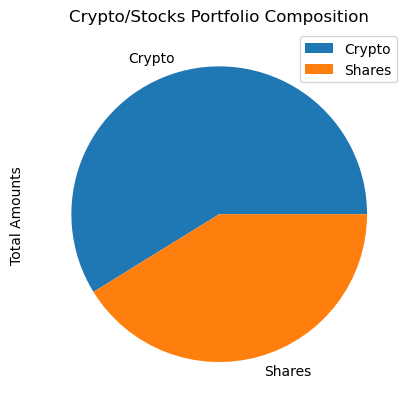

In [228]:
# Plot savings pie chart
df_savings.plot.pie(y="Total Amounts", title = "Crypto/Stocks Portfolio Composition")

In [229]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto+shares
shortfall = emergency_fund-total_savings
# Validate saving health
if  total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund. WHOOOOHOOOO!!!!")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your financial goal of having an ideal emergency fund.")
else:
    print(f"You are ${shortfall} away from reaching your financial goal for an ideal emergency fund.")

Congratulations! You have enough money in your emergency fund. WHOOOOHOOOO!!!!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [230]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_datee = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_datee = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [231]:
# Get 5 years' worth of historical data for SPY and AGG
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_datee,
    end=end_datee
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_ticker[df_ticker['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_ticker[df_ticker['symbol']=='SPY'].drop('symbol',axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=['AGG', 'SPY'])

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.92  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.52  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  204.99  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.56  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.08  205.77  203.88   

                                                                        
                              close     volume trade_count        vwap  
timestamp                                                               
2016-05-02 04:00:00+00:00  207.9700   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.1592  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  205.0100   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.9700   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.7200   89131004      340335  204.937074

In [232]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(portfolio_data=df_stock_data, weights = [0.4,0.6], num_simulation=500, num_trading_days=252*30)

In [233]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
timestamp                                                                 
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.605  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.810  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.860  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.140  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.970  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.92   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001853  206.52   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  204.99   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.56   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.08   

                                                                            \
                             high     low     close     volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  208.18  206.41  207.9700   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.1592  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  205.0100   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.9700   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.7200   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.008707  
2016-05-04 04:00:00+00:00  205.090172    -0.005574  
2016-05-05 04:00:00+00:00  205.141555    -0.000195  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [234]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991937,0.993569,1.000726,0.997667,0.994561,1.008967,0.998760,1.006218,0.994863,0.993942,...,1.005097,1.007524,1.014878,1.001588,0.993725,1.013225,0.991816,1.009171,0.999507,0.999884
2,0.999863,0.997211,0.991448,1.006108,0.981818,1.009364,1.000721,1.010040,0.989267,0.999120,...,1.001666,1.004918,1.000766,1.012964,1.009129,1.023730,0.989247,1.004455,1.004127,0.996315
3,0.991099,0.999628,1.002617,1.013415,0.975716,1.021716,1.005530,1.015462,0.998928,1.007492,...,1.001798,1.013128,0.990940,1.016094,1.006954,1.013168,0.981265,1.017060,0.998374,0.990698
4,0.987810,1.000765,1.000415,1.019955,0.971894,1.015475,1.017240,1.019086,0.988057,1.001995,...,0.999689,1.014954,0.982533,1.019520,1.016063,1.004905,0.980154,1.025216,1.006765,0.994263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,21.187977,22.997528,97.588894,4.645073,12.298735,6.407387,15.414903,28.337724,16.598783,73.731060,...,21.992046,7.685889,18.255661,17.338119,11.463181,28.619897,22.161963,9.212649,6.962529,29.613901
7557,21.083348,22.668408,97.310785,4.662273,12.517051,6.384626,15.300796,28.228906,16.645404,74.336706,...,22.000332,7.656899,18.305192,17.413298,11.405016,28.801522,22.183962,9.240156,6.993829,29.528842
7558,21.342126,22.763959,96.697931,4.680158,12.505326,6.367608,15.396195,28.250173,16.841547,74.520941,...,21.868759,7.676545,18.315071,17.627025,11.449349,28.568803,22.328684,9.300996,6.955712,29.601898
7559,21.429400,22.782149,95.763313,4.713662,12.454648,6.337442,15.495533,28.217880,16.981755,74.558418,...,21.760551,7.701575,18.046983,17.607618,11.446862,28.564635,22.291033,9.357381,6.935091,29.548580


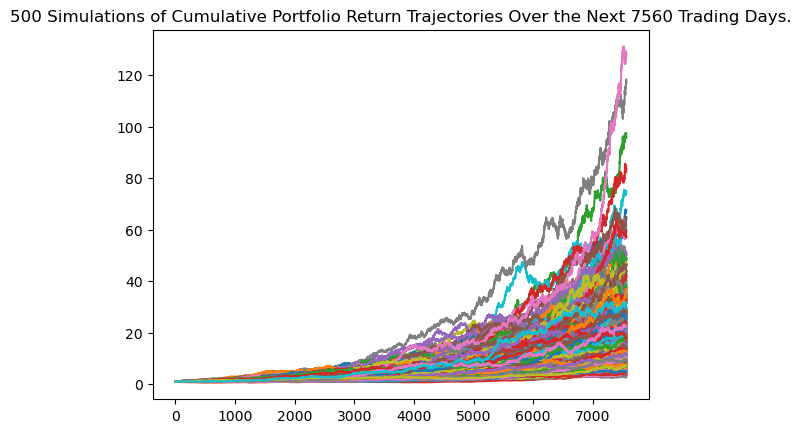

In [238]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

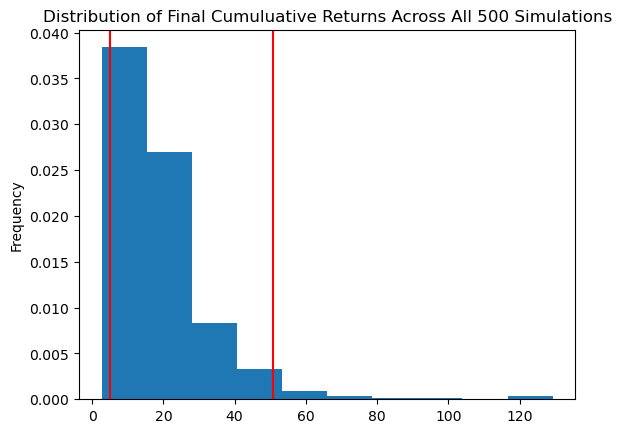

In [239]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [187]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             18.720467
std              10.933757
min               3.222766
25%              11.146150
50%              15.455992
75%              23.245911
max              64.732374
95% CI Lower      4.920774
95% CI Upper     46.434760
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [188]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $98415.48 and $928695.19


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [235]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $35360.94 and $146820.05.


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [191]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(portfolio_data=df_stock_data, weights = [0.4,0.6], num_simulation=500, num_trading_days=252*5)

In [193]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999393,1.007623,1.010541,0.995435,0.997773,0.998777,0.996389,1.006467,0.993296,1.000029,...,0.996346,1.017390,1.012487,0.999649,0.990495,1.011430,0.998643,0.995104,1.004713,1.002180
2,0.985154,1.002525,1.008455,0.992143,1.009926,1.005609,1.003042,1.015223,1.003852,1.003761,...,1.000643,1.015078,0.999474,0.999001,0.987090,1.011432,1.001304,0.983508,1.007026,1.018806
3,0.983179,1.014650,1.003181,0.984298,1.013805,1.001614,0.993564,1.031727,1.002256,1.000456,...,0.996476,1.015495,1.005585,1.002666,0.977366,1.015842,1.002875,0.988771,1.009643,1.014959
4,0.978543,1.022733,1.007585,0.976493,1.015861,1.007146,0.990668,1.033963,1.004420,1.004438,...,0.995214,1.022147,1.017279,0.991436,0.988088,1.015343,1.010080,0.999756,0.998389,1.021744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.113069,1.647420,0.917599,1.658112,1.646006,2.285672,1.464676,1.278283,1.733648,2.091399,...,1.548831,2.185702,1.191239,1.681587,1.619234,1.113303,2.069301,1.076944,1.993852,1.772934
1257,2.115449,1.659698,0.923095,1.657027,1.662996,2.313504,1.456889,1.289261,1.737802,2.075333,...,1.552509,2.156289,1.192673,1.675894,1.625742,1.115147,2.077845,1.083904,2.004357,1.797103
1258,2.143191,1.666825,0.930652,1.664788,1.676565,2.315004,1.437448,1.291163,1.723274,2.065112,...,1.556588,2.145389,1.200494,1.679939,1.636792,1.116869,2.061559,1.090096,1.974501,1.793072
1259,2.137264,1.650400,0.919747,1.677941,1.674093,2.289633,1.451870,1.287906,1.715971,2.073629,...,1.549979,2.126528,1.200490,1.666101,1.644214,1.118692,2.059478,1.093721,1.960860,1.793265


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

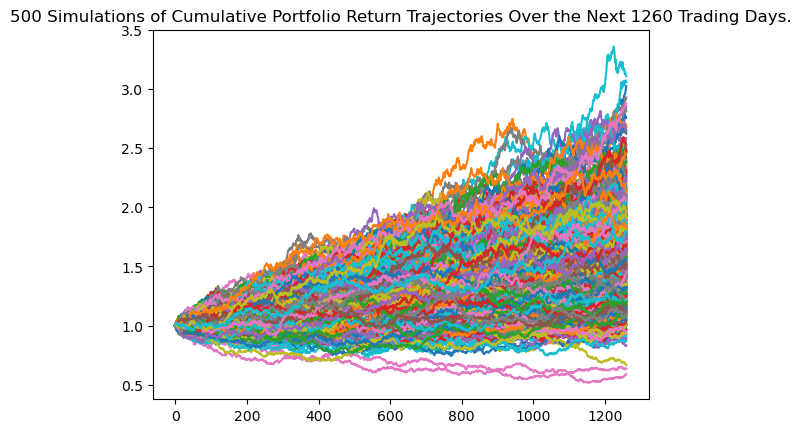

In [194]:
# Plot simulation outcomes
MC_fiveyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

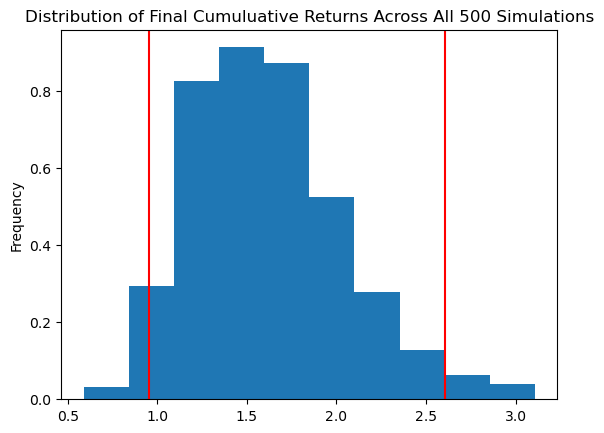

In [195]:
# Plot probability distribution and confidence intervals
MC_fiveyear.plot_distribution()

In [196]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              1.620880
std               0.425220
min               0.590625
25%               1.306437
50%               1.580108
75%               1.863335
max               3.107483
95% CI Lower      0.952714
95% CI Upper      2.604100
Name: 1260, dtype: float64


In [206]:
# Set initial investment
inital_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(tbl[8]*60000,2)
ci_upper_five = round(tbl[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $79036.66 and $297170.32


### Ten Years Retirement Option

In [207]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(portfolio_data=df_stock_data, weights = [0.4,0.6], num_simulation=500, num_trading_days=252*10)

In [208]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.987356,0.996105,1.002574,1.009580,1.003006,1.000716,1.007185,0.997571,1.006449,1.000405,...,1.010042,1.004352,0.998443,0.998549,1.002233,1.004841,0.992877,0.995824,0.994394,1.001194
2,0.987189,1.000237,0.991476,1.007552,1.009038,1.012000,1.016583,0.997534,1.001416,1.006431,...,1.011363,1.006102,0.988010,0.993716,1.006885,1.013419,0.983533,0.991898,0.998285,1.001972
3,0.987915,0.995567,0.993737,1.013734,1.000641,1.005688,1.019270,0.998165,1.005329,0.999160,...,1.006017,1.006625,1.000655,0.993251,1.011496,1.023197,0.972745,0.982679,0.996247,1.000348
4,0.982672,0.976140,0.995256,1.014936,0.996147,1.004341,1.019925,0.990965,1.005734,1.000744,...,1.006700,1.003265,1.004656,0.991026,1.012444,1.021631,0.975071,0.978485,0.991587,1.015467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.378983,3.437093,2.844333,3.034816,4.261405,2.792752,2.402502,2.584686,2.196556,4.642286,...,3.078801,1.853523,2.759003,6.856079,1.866710,1.957309,2.932762,3.044886,1.364173,3.631953
2517,1.380802,3.379532,2.872287,3.016329,4.237757,2.809856,2.415945,2.570587,2.192186,4.587983,...,3.091161,1.851203,2.752957,6.853841,1.874898,1.962302,2.969027,3.045696,1.366423,3.620214
2518,1.392614,3.363276,2.878110,3.043084,4.148818,2.808242,2.411009,2.594633,2.182181,4.568101,...,3.115489,1.839139,2.772029,6.759741,1.863279,1.941421,2.983605,3.074112,1.379980,3.616131
2519,1.378730,3.384796,2.906217,3.048590,4.149973,2.782857,2.415624,2.580879,2.186738,4.573608,...,3.125304,1.852154,2.759432,6.708517,1.867578,1.946857,2.970139,3.090051,1.383288,3.625248


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

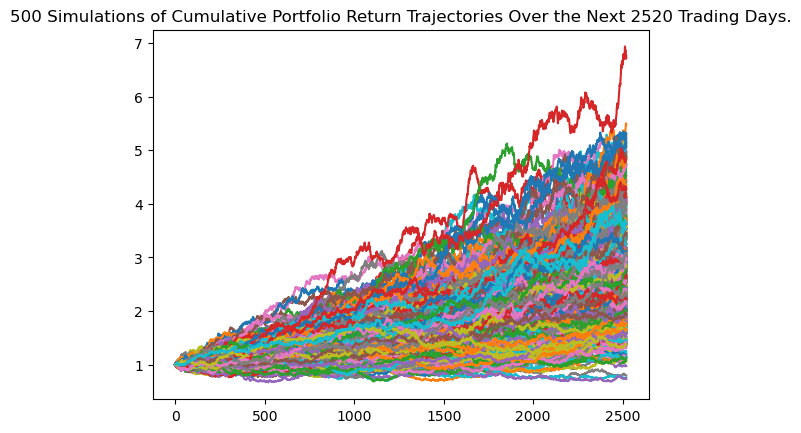

In [211]:
# Plot simulation outcomes
MC_tenyear.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

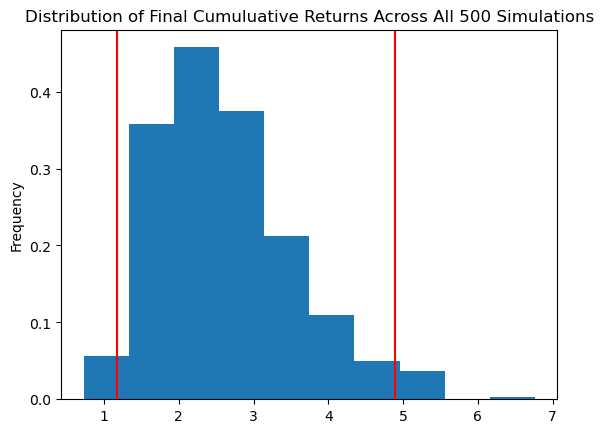

In [212]:
# Plot probability distribution and confidence intervals
MC_tenyear.plot_distribution()

In [213]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              2.610915
std               0.930390
min               0.732430
25%               1.939341
50%               2.451238
75%               3.127444
max               6.762699
95% CI Lower      1.178698
95% CI Upper      4.894002
Name: 2520, dtype: float64


In [237]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}. If weighting the portfolio more heavily toward stocks will allow" 
      f"the credit union members to retire after only 10 years, we need to consider the returns and risks"
      f"associated with investing in stocks. In general, stocks have higher returns but also higher risks"
      f"compared to other assets like bonds. While it's possible that a more aggressive investment strategy" 
      f"might result in a significant increase in the portfolio value, it's also possible that the portfolio"
      f"could experience substantial losses due to market volatility")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $70721.87 and $293640.1. If weighting the portfolio more heavily toward stocks will allowthe credit union members to retire after only 10 years, we need to consider the returns and risksassociated with investing in stocks. In general, stocks have higher returns but also higher riskscompared to other assets like bonds. While it's possible that a more aggressive investment strategymight result in a significant increase in the portfolio value, it's also possible that the portfoliocould experience substantial losses due to market volatility
